In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [21]:
df = pd.read_csv('AmesHousing.csv')
print(df.head(3))

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  

[3 rows x 82 columns]


In [22]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']
print(df.isnull().sum())

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [23]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', 'passthrough')  
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)

In [24]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_estimators=100))
])


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   'passthrough')]),
                                                  ['Order', 'PID',
                                                   'MS SubClass',
                                                   'Lot Frontage', 'Lot Area',
                                                   'Overall Qual',
                                                   'Overall Cond', 'Year Built',
                                                   'Year Remod/Add',
                                                   'Mas Vnr Area',
                                                   'BsmtFin SF 1',
                                                   'BsmtFin SF 2',
                                                   'Bsmt Unf SF',
                                                   'Total Bsmt SF',
                                                   '1st Flr SF', '2nd Flr SF',
                                                   'Low Qual Fin SF...
                                                   'Lot Config', 'Land Slope',
                                                   'Neighborhood',
                                                   'Condition 1', 'Condition 2',
                                                   'Bldg Type', 'House Style',
                                                   'Roof Style', 'Roof Matl',
                                                   'Exterior 1st',
                                                   'Exterior 2nd',
                                                   'Mas Vnr Type', 'Exter Qual',
                                                   'Exter Cond', 'Foundation',
                                                   'Bsmt Qual', 'Bsmt Cond',
                                                   'Bsmt Exposure',
                                                   'BsmtFin Type 1',
                                                   'BsmtFin Type 2', 'Heating',
                                                   'Heating QC', 'Central Air',
                                                   'Electrical', ...])])),
                ('model', RandomForestRegressor(random_state=42))])

<Figure size 800x600 with 0 Axes>

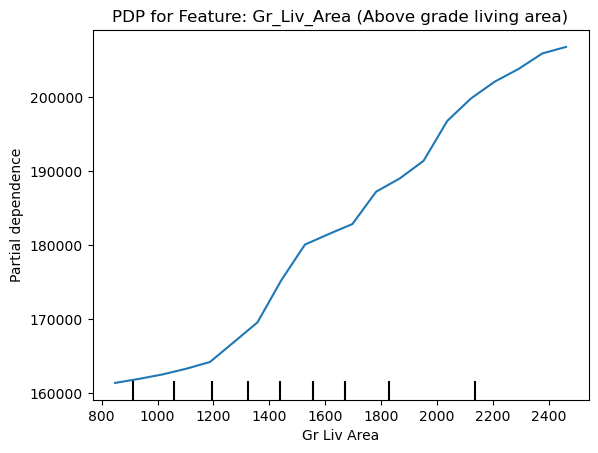

In [27]:
plt.figure(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(pipeline, X_train, ["Gr Liv Area"], grid_resolution=20)
plt.title("PDP for Feature: Gr_Liv_Area (Above grade living area)")
plt.show()

<Figure size 800x600 with 0 Axes>

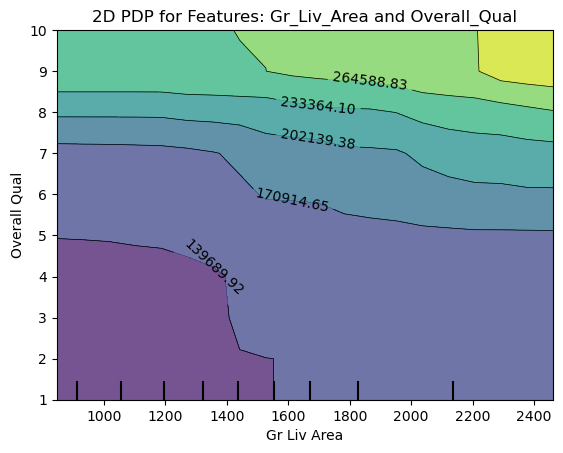

In [29]:
plt.figure(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(pipeline, X_train, [("Gr Liv Area", "Overall Qual")], grid_resolution=20)
plt.title("2D PDP for Features: Gr_Liv_Area and Overall_Qual")
plt.show()

In [31]:
gr_liv_area_range = np.linspace(X_train["Gr Liv Area"].min(), X_train["Gr Liv Area"].max(), 100)
predictions_gr_liv_area = []

In [32]:
for value in gr_liv_area_range:
    input_data = X_train.copy()
    input_data['Gr Liv Area'] = value
    input_data['Overall Qual'] = input_data['Overall Qual'].mean()  
    pred = pipeline.predict(input_data)
    predictions_gr_liv_area.append(np.mean(pred))


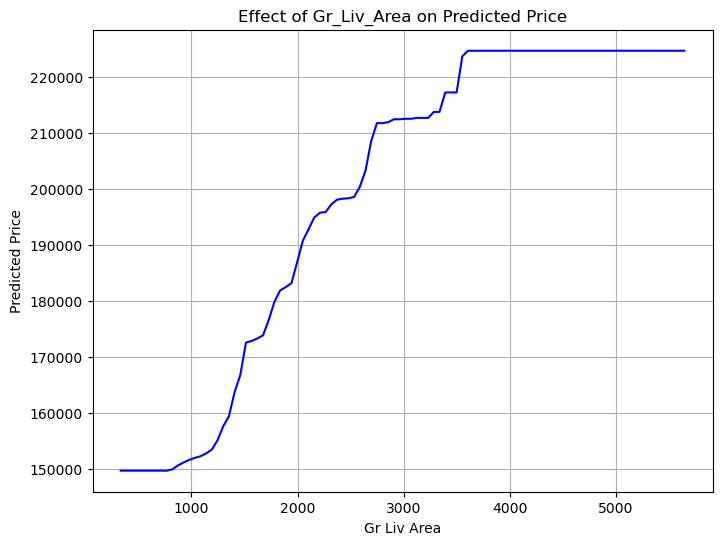

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(gr_liv_area_range, predictions_gr_liv_area, color='blue')
plt.xlabel('Gr Liv Area')
plt.ylabel('Predicted Price')
plt.title('Effect of Gr_Liv_Area on Predicted Price')
plt.grid()
plt.show()

In [34]:
overall_qual_range = np.linspace(X_train["Overall Qual"].min(), X_train["Overall Qual"].max(), 100)
predictions_overall_qual = []

In [35]:
for value in overall_qual_range:
    input_data = X_train.copy()
    input_data['Overall Qual'] = value
    input_data['Gr Liv Area'] = input_data['Gr Liv Area'].mean()  
    pred = pipeline.predict(input_data)
    predictions_overall_qual.append(np.mean(pred))

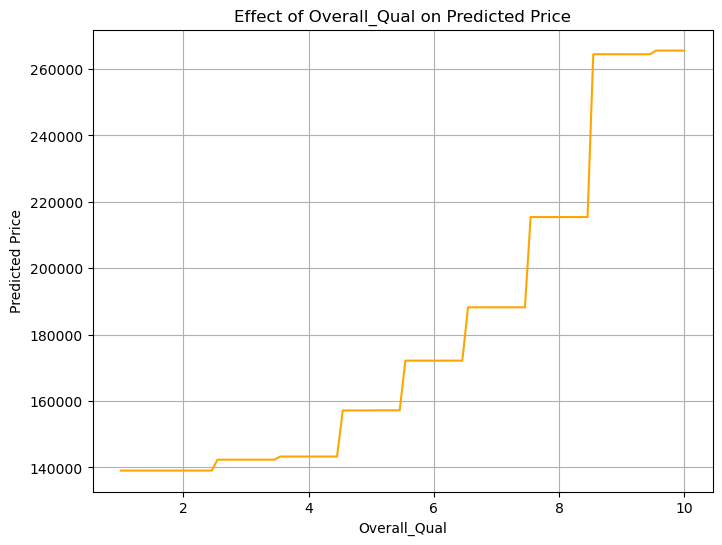

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(overall_qual_range, predictions_overall_qual, color='orange')
plt.xlabel('Overall_Qual')
plt.ylabel('Predicted Price')
plt.title('Effect of Overall_Qual on Predicted Price')
plt.grid()
plt.show()